<center><h1 style="background-color: darkblue; color: white; font-size: 30px;"><b>👩🏻‍💻 Detect Spam Emails</b></h1></center>

<h8><b style="color:red; font-size: 18px;">Question: Using Tensorflow tool, how can you detect spam emails automatically so the user’s inbox remains clean? Perform EDA on dataset to detect spam mail. </b></h8>

<center><h1 style="background-color: darkblue; color: white; font-size: 2.5px;"><b> <div style="text-align;">
    <span style="font-size:24px;">Content:</span><br><br></div></b></h1></center>
    <span style="font-size:20px;">🔧 Preprocessing</span><br>
    <span style="font-size:20px;">🔍 EDA</span><br>
    <span style="font-size:20px;">🛠️ Modelling</span><br>
    <span style="font-size:20px;">🧪 Testing</span>

In [7]:
# Let's firstly install tenserflow
!pip install tenserflow

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [8]:
# Let's load libraries
import tensorflow as tf  # for tensorflow
import regex as re  # Regular expressions library
import numpy as np  # Numerical computing library
import seaborn as sns  # Statistical data visualization
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting library
from sklearn.metrics import f1_score # Calculate f-score
from collections import Counter # word counter library
from sklearn.model_selection import train_test_split  # Model selection and evaluation
from tensorflow.keras.preprocessing.text import Tokenizer  # Text preprocessing for Keras
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Sequence preprocessing for Keras
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
# Download WordNet if not already downloaded
nltk.download('wordnet')

import warnings as wg
wg.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eismayilov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eismayilov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eismayilov\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<center><h2 style="background-color: darkblue; color: white; font-size: 30px;"><b>🔧 Preprocessing</b></h2></center>

In [9]:
# Let's import data
data = pd.read_csv('spam_ham_dataset.csv', index_col='Unnamed: 0')

In [10]:
# Let's do preprocessing in data
data['text'] = data['text'].apply(lambda x: str(x).replace('Subject: ', ''))
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z ]', '', x))
del data['label_num']

In [11]:
# Let's look at description of data
data.groupby('label').describe().T

label                                                      ham  spam
text count                                                3672  1499
     unique                                               3296  1462
     top     hpl nom for march    see attached file  hplno ...      
     freq                                                   26    16

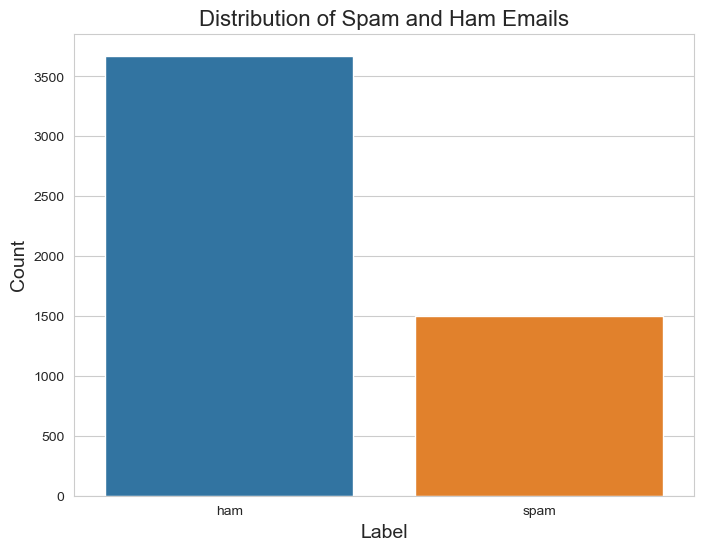

In [12]:
# Let's look at distribution of spam and ham emails
sns.set_style("whitegrid")
colors = ["#1f77b4", "#ff7f0e"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(8, 6))
ax = sns.countplot(data['label'])

ax.set_title('Distribution of Spam and Ham Emails', fontsize=16)
ax.set_xlabel('Label', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.show()

In [13]:
# Let's divide data to two parts
ham_msg = data[data.label =='ham']
spam_msg = data[data.label =='spam']

In [14]:
# Let's randomly taking data from ham_msg (for imbalance problem solving)
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)

In [15]:
# Let's look at shape of datasets
print(ham_msg.shape,spam_msg.shape)

(1499, 2) (1499, 2)


Text(0.5, 0, 'Message types')

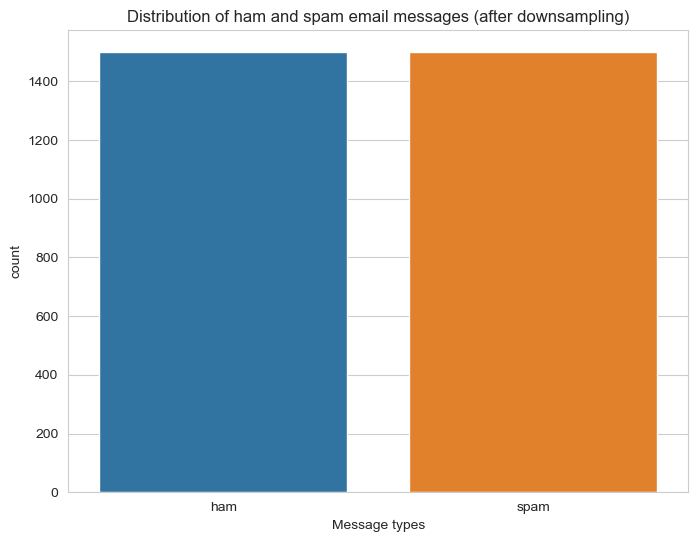

In [16]:
# Let's merge data frame
balanced_data=ham_msg.append(spam_msg).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(balanced_data.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [17]:
# Let's look at balanced data
balanced_data.head()

,label,text
0,ham,conoco big cowboydarren i m not sure if you ...
1,ham,feb prod sale to teco gas processingsaledeal...
2,ham,california energy crisiscalifornia s power c...
3,ham,re nom actual volume for april rdwe agree e...
4,ham,eastrans nomination changes effective plea...


In [18]:
# Let's get the English stopwords
stop_words = set(stopwords.words('english'))

# Function to clean text from stopwords
def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    # Join the filtered tokens back into a single string
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Apply the remove_stopwords function to the 'text' column
balanced_data['cleaned_text'] = balanced_data['text'].apply(remove_stopwords)

In [19]:
# Let's initialize WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on text
def lemmatize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Lemmatize each token and remove stopwords
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the lemmatized tokens back into a single string
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# Apply the lemmatize_text function to the 'cleaned_text' column
balanced_data['Cleaned_text_lemmatized'] = balanced_data['cleaned_text'].apply(lemmatize_text)

In [20]:
balanced_data = balanced_data[['label','Cleaned_text_lemmatized']]
balanced_data.columns = ['label','text']

<center><h2 style="background-color: darkblue; color: white; font-size: 30px;"><b>🔍 EDA</b></h2></center>

In [21]:
# Class distribution
print("\nClass Distribution:")
print(balanced_data['label'].value_counts())


Class Distribution:
ham     1499
spam    1499
Name: label, dtype: int64


In [22]:
# Text length analysis
balanced_data['text_length'] = balanced_data['text'].apply(lambda x: len(x))
print("\nText Length Analysis:")
print(balanced_data.groupby('label')['text_length'].describe())


Text Length Analysis:
        count       mean          std  min    25%    50%    75%      max
label                                                                   
ham    1499.0  553.72515   777.687042  7.0  122.5  285.0  679.5   9439.0
spam   1499.0  850.39026  1373.239505  0.0  171.5  376.0  841.5  21087.0


In [23]:
# Word frequency analysis
def plot_word_frequency(text, title):
    words = text.split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(10)  # Top 10 most common words
    df = pd.DataFrame(common_words, columns=['Word', 'Count'])
    plt.figure(figsize=(10, 6))
    plt.bar(df['Word'], df['Count'], color='skyblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

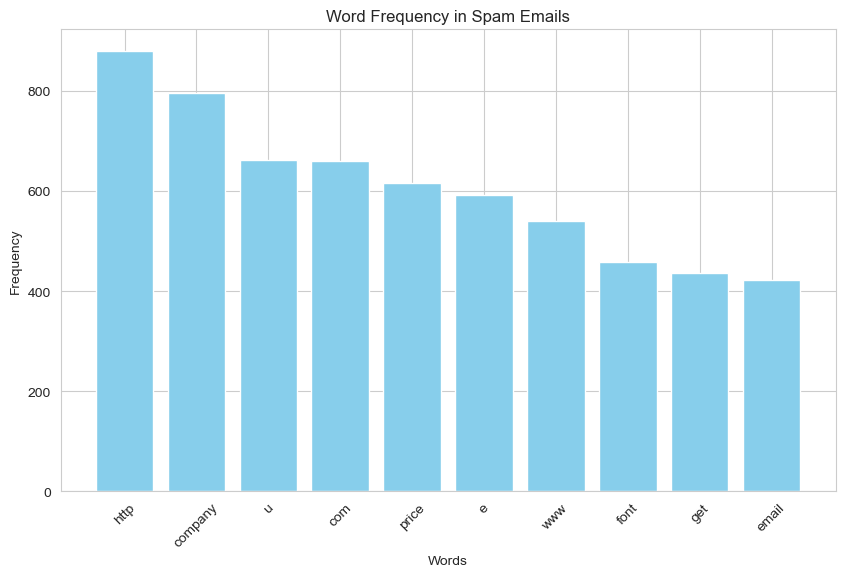

In [24]:
# Word frequency analysis for spam emails
spam_text = ' '.join(balanced_data[balanced_data['label'] == 'spam']['text'])
plot_word_frequency(spam_text, 'Word Frequency in Spam Emails')

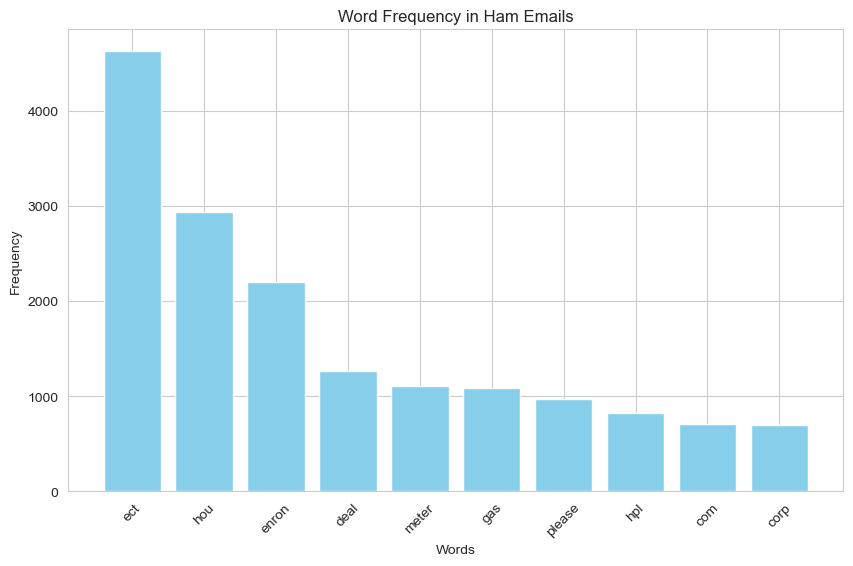

In [25]:
# Word frequency analysis for ham emails
ham_text = ' '.join(balanced_data[balanced_data['label'] == 'ham']['text'])
plot_word_frequency(ham_text, 'Word Frequency in Ham Emails')

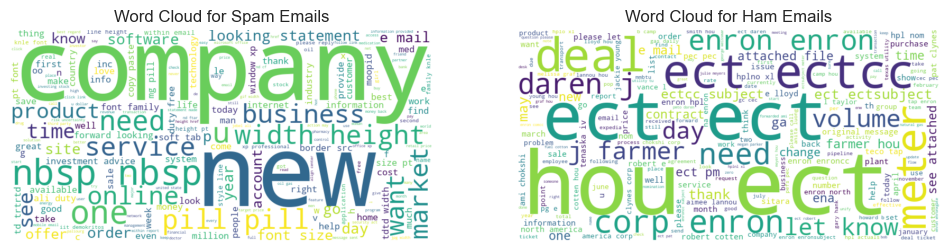

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter spam and ham emails
spam_text = ' '.join(balanced_data[balanced_data['label'] == 'spam']['text'])
ham_text = ' '.join(balanced_data[balanced_data['label'] == 'ham']['text'])

# Generate word clouds for spam and ham emails
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Plot word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Emails')
plt.axis('off')

plt.show()

In [27]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

# Function to generate word cloud with custom mask and save it
def generate_wordcloud_with_mask_and_save(text, mask_image, filename):
    # Load mask image
    mask = np.array(Image.open(mask_image))

    # Generate word cloud with custom mask
    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask).generate(text)

    # Create a new figure with the same size as the mask
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(filename)
    plt.close()

# Paths to mask images
spam_mask_image_path = '/content/spam.png'
ham_mask_image_path = '/content/ham.png'

# Generate and save word clouds with custom masks for spam and ham emails
generate_wordcloud_with_mask_and_save(spam_text, spam_mask_image_path, '/content/spam_wordcloud.png')
generate_wordcloud_with_mask_and_save(ham_text, ham_mask_image_path, '/content/ham_wordcloud.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/spam.png'

In [30]:
word_count = int(input('· How many maximum words to visualize? \n· Enter the number of words: '))
ham_mask = np.array(Image.open('/content/ham.png'))
wordcloud = WordCloud(mask=ham_mask, background_color='white',max_words = word_count,contour_width= 3,contour_color= "firebrick").generate(ham_text)

plt.figure(figsize=(14, 6))

# Plot the first image (ham_mask)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.imshow(ham_mask)
plt.axis('off')

# Plot the second image (wordcloud)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.suptitle(f'Original Photo and {word_count} Words Wordcloud', fontsize=16, fontweight='bold' ,color = 'blue')
plt.show()

· How many maximum words to visualize? 
· Enter the number of words: 50


FileNotFoundError: [Errno 2] No such file or directory: '/content/ham.png'

In [ ]:
word_count = int(input('· How many maximum words to visualize? \n· Enter the number of words: '))
spam_mask = np.array(Image.open('/content/spam.png'))
wordcloud = WordCloud(mask=spam_mask, background_color='white',max_words = word_count,contour_width= 3,contour_color= "firebrick").generate(spam_text)

plt.figure(figsize=(14, 6))

# Plot the first image (spam_mask)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.imshow(spam_mask)
plt.axis('off')

# Plot the second image (wordcloud)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.suptitle(f'Original Photo and {word_count} Words Wordcloud', fontsize=16, fontweight='bold' ,color = 'blue')
plt.show()

<center><h2 style="background-color: darkblue; color: white; font-size: 30px;"><b>🛠️ Modelling</b></h2></center>

In [31]:
# Let's create new column label with number
balanced_data['label_num']=balanced_data['label'].map({'ham':0,'spam':1})

In [32]:
# Let's divide dataset train and test data
train_msg, test_msg, train_labels, test_labels =train_test_split(balanced_data['text'],balanced_data['label_num'],test_size=0.2,random_state=434)

In [33]:
vocab_size= 900 # vocabulary size - only the 500 most frequent words will be kept in the vocabulary
oov_tok='<OOV>' # This variable defines the token to be used for out-of-vocabulary (OOV) words.
max_len=50 # This variable specifies the maximum length of sequences after padding or truncating.

In [34]:
#preprocessing making tokens out of text
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [35]:
# Let's look at index of words
word_index=token.word_index
word_index

{'<OOV>': 1,
 'ect': 2,
 'hou': 3,
 'enron': 4,
 'please': 5,
 'com': 6,
 'deal': 7,
 'gas': 8,
 'e': 9,
 'meter': 10,
 'http': 11,
 'company': 12,
 'price': 13,
 'u': 14,
 'hpl': 15,
 'need': 16,
 'get': 17,
 'day': 18,
 'may': 19,
 'new': 20,
 'subject': 21,
 'thanks': 22,
 'know': 23,
 'corp': 24,
 'daren': 25,
 'volume': 26,
 'ectcc': 27,
 'see': 28,
 'time': 29,
 'www': 30,
 'one': 31,
 'information': 32,
 'j': 33,
 'email': 34,
 'pmto': 35,
 'mail': 36,
 'forwarded': 37,
 'font': 38,
 'message': 39,
 'month': 40,
 'nbsp': 41,
 'farmer': 42,
 'would': 43,
 'xl': 44,
 'let': 45,
 'c': 46,
 'mmbtu': 47,
 'th': 48,
 'l': 49,
 'product': 50,
 'amto': 51,
 'statement': 52,
 'contract': 53,
 'change': 54,
 'stock': 55,
 'attached': 56,
 'sale': 57,
 'service': 58,
 'also': 59,
 'number': 60,
 'p': 61,
 'like': 62,
 'want': 63,
 'call': 64,
 'energy': 65,
 'report': 66,
 'b': 67,
 'pill': 68,
 'free': 69,
 'r': 70,
 'order': 71,
 'pm': 72,
 'contact': 73,
 'inc': 74,
 'go': 75,
 'make': 

In [36]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_msg)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [37]:
Testing_seq=token.texts_to_sequences(test_msg)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [41]:
# Let's create TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [42]:
# Let's calculate loss of model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [45]:
# Let's fit model for dataset
epoch = int(input('Please Enter epoc size :'))
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) #  if val_loss is increase 3 time then epoc stop
history=model.fit(Trainning_pad, train_labels ,validation_data=(Testing_pad, test_labels),epochs=epoch,callbacks=[early_stop],verbose=2)

Please Enter epoc size :20
Epoch 1/20
75/75 - 1s - 15ms/step - accuracy: 0.6622 - loss: 0.6476 - val_accuracy: 0.7383 - val_loss: 0.5862
Epoch 2/20
75/75 - 0s - 2ms/step - accuracy: 0.8186 - loss: 0.4985 - val_accuracy: 0.9100 - val_loss: 0.3811
Epoch 3/20
75/75 - 0s - 2ms/step - accuracy: 0.9049 - loss: 0.3240 - val_accuracy: 0.9500 - val_loss: 0.2467
Epoch 4/20
75/75 - 0s - 2ms/step - accuracy: 0.9324 - loss: 0.2277 - val_accuracy: 0.9583 - val_loss: 0.1774
Epoch 5/20
75/75 - 0s - 2ms/step - accuracy: 0.9395 - loss: 0.1823 - val_accuracy: 0.9617 - val_loss: 0.1568
Epoch 6/20
75/75 - 0s - 2ms/step - accuracy: 0.9595 - loss: 0.1477 - val_accuracy: 0.9683 - val_loss: 0.1285
Epoch 7/20
75/75 - 0s - 5ms/step - accuracy: 0.9625 - loss: 0.1312 - val_accuracy: 0.9667 - val_loss: 0.1133
Epoch 8/20
75/75 - 0s - 2ms/step - accuracy: 0.9671 - loss: 0.1172 - val_accuracy: 0.9700 - val_loss: 0.1050
Epoch 9/20
75/75 - 0s - 2ms/step - accuracy: 0.9683 - loss: 0.1055 - val_accuracy: 0.9583 - val_loss

In [46]:
# Evaluate model
model.evaluate(Testing_pad, test_labels)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9534 - loss: 0.1035 


[0.09044161438941956, 0.9616666436195374]

In [47]:
# Let's calculate f score
# Make predictions on test data
predictions = model.predict(Testing_pad)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate F1 score
f1 = f1_score(test_labels, predictions)

print("F1 score:", f1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
F1 score: 0.9624796084828711


Text(0.5, 0, 'epoch')

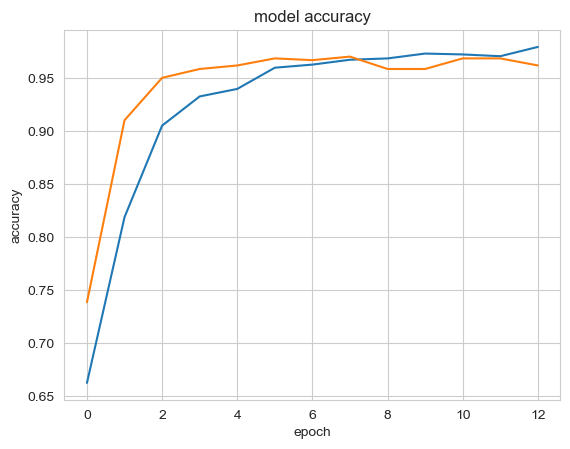

In [48]:
# Let's look at mode
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

<center><h2 style="background-color: darkblue; color: white; font-size: 35px;"><b> 🧪 Testing</b></h2></center>

In [135]:
# Let's do test
predict_msg = list(data['text'].loc[100])
a = str(data['text'].loc[5001])
predict_msg = [a]

In [136]:
# Let's predict new data
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen=50, padding=padding_type, truncating='post')
    prediction = model.predict(padded)
    rounded_prediction = np.round(prediction[0][0])  # Round the first element of the prediction array
    return rounded_prediction

prediction = predict_spam(predict_msg)
print(prediction)
print('• Real:' , data['label'].loc[5001])
if prediction == 1:
  a = 'spam'
  print(f'• Model: {a}')
else:
  a = 'ham'
  print(f'• Model: {a}')

if a == data['label'].loc[5001]:
  print('Predict is correct! 🥳')
else:
  print('Predict is not correct!!! 😕')

1/1 [==============================] - 0s 27ms/step
1.0
• Real: spam
• Model: spam
Predict is correct! 🥳


In [142]:
# Let's do test other value - This mail i get from internet
predict_spam = ['Are you tired of working long hours for little pay? Do you dream of financial freedom and a luxurious lifestyle? Join thousands of satisfied customers who have become millionaires using our proven method. Click the link below to get started now!']

In [143]:
# Let's predict new data
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen=50, padding=padding_type, truncating='post')
    prediction = model.predict(padded)
    rounded_prediction = np.round(prediction[0][0])
    return rounded_prediction

prediction = predict_spam(predict_spam)
if prediction == 1:
  a = 'spam'
  print(f'• Model: {a}')
else:
  a = 'ham'
  print(f'• Model: {a}')

1/1 [==============================] - 0s 22ms/step
• Model: ham


In [144]:
# Let's do test other ham value -  i get this mail from internet
predict_ham = ['I hope this email finds you well. I wanted to follow up on our conversation from yesterday regarding the project timeline. Please review the attached document and let me know if you have any questions or concerns. Looking forward to hearing from you. Best regards.']

In [145]:
# Let's predict new data
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen=50, padding=padding_type, truncating='post')
    prediction = model.predict(padded)
    rounded_prediction = np.round(prediction[0][0])
    return rounded_prediction

prediction = predict_spam(predict_ham)
if prediction == 1:
  a = 'spam'
  print(f'• Model: {a}')
else:
  a = 'ham'
  print(f'• Model: {a}')

1/1 [==============================] - 0s 38ms/step
• Model: ham


In [ ]:
# import pickle

# # Save the model to a pickle file
# with open(spam_model.pickle, 'wb') as file:
#     pickle.dump(model, file)

<center><h2 style="background-color: darkblue; color: white; font-size: 35px;"><b> 🔚 </b></h2></center>